<a href="https://colab.research.google.com/github/rioluvy/Data-analysis-and-visualization/blob/main/Encapsulation/M10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<BarContainer object of 3 artists>

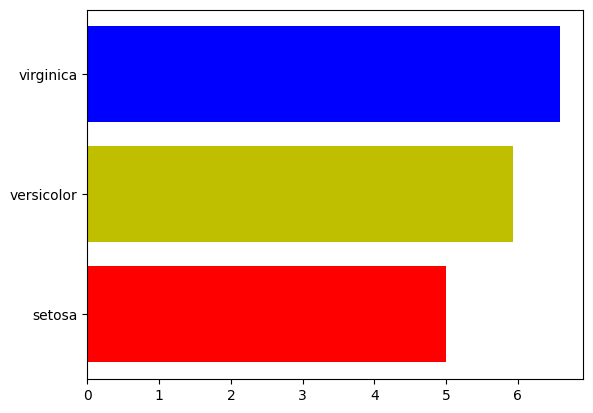

In [ ]:
iris = sns.load_dataset('iris')

## barh(수평 막대 그래프)
# 수직 형태의 Bar그래프 사용이 불가능 할 경우, 범주별 데이터를 수평 막대로 표현
# barh()함수를 사용
# bar()함수와 다르게 y와 x순서대로 받아옴
# bar()와 동일하게 color인자를 변경가능

# iris종에 따른 sepal_length의 평균
x = iris.groupby('species').sepal_length.mean().values
y = iris.groupby('species').sepal_length.mean().index
color = ['r','y','b']
plt.barh(y,x, color = color)

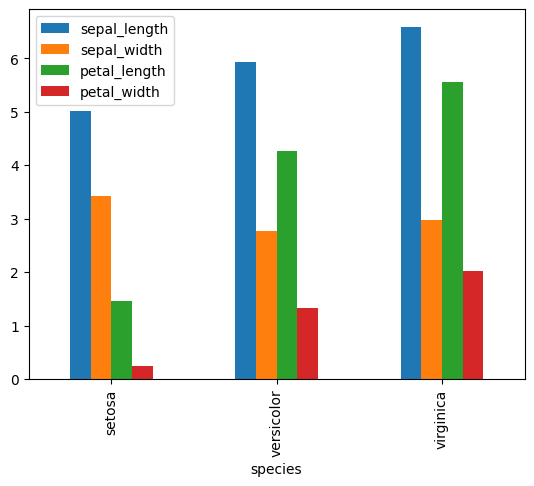

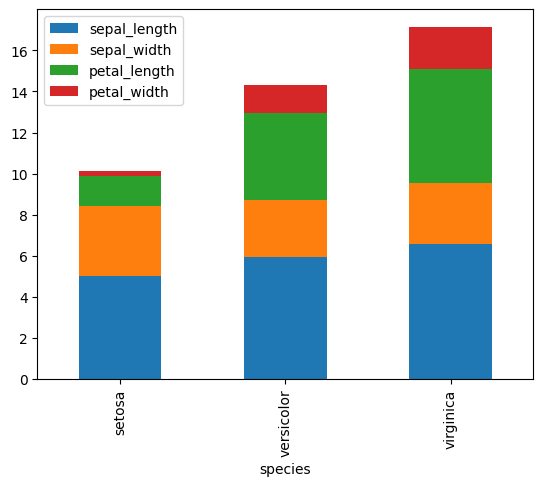

In [ ]:
## 누적 막대 그래프
# Bar 그래프에서 하나의 Bar가 몇가지 카테고리로 나누어지는 경우
# Pandas.plot.bar()를 활용
# 여러 범주의 데이터를 쌓은 Stacked Bar 형태로 표현

grouped_iris = iris.groupby('species').mean().reset_index() ## species가 인덱스가 되서 일반 열로 바꿔주기 위해 reset_index
# Stacked = False(default)
grouped_iris.plot.bar(x = 'species')  ## species가 일반 열이기 때문에 x의 인자로 사용가능(x는 인덱스는 참조 불가능)
plt.show()

grouped_iris.plot.bar(x = 'species', stacked = True)
plt.show()

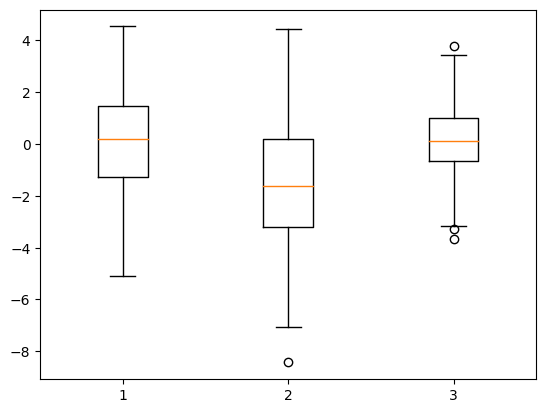

{'whiskers': [<matplotlib.lines.Line2D at 0x7d7af56e2fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d7af56e0a30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d7af56e0430>,
 'medians': [<matplotlib.lines.Line2D at 0x7d7afa7148b0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7d7afa715990>,
 'means': []}

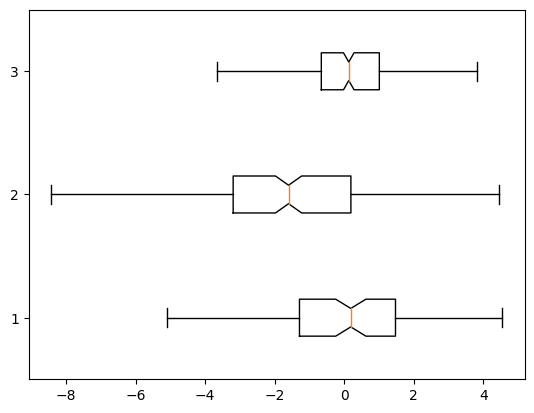

In [ ]:
## Box plot
#  특정 카테고리의 수치 데이터의 범위를 표현할때 주로 사용
# 정보: 최소/최대값, 사분위수, Outlier, Median
# box()함수: 각 box들의 값들의 목록을 받아옴

np.random.seed(0) ## numpy에서 랜덤 숫자 생성기에서 사용하는 시드를 설정하는 함수, 이후에 생성되는 랜덤 숫자가 항상 동일한 순서로 생성되기 때문에 결과가 재현 가능해진다.

# normal: 정규분포 데이터 생성(평균, 표준편차, 해당 개수만큼의 난수 생성)

data_a = np.random.normal(0,2.0,100)
data_b = np.random.normal(-1.5,2.5,200)
data_c = np.random.normal(0.3,1.3,300)
plt.boxplot([data_a,data_b,data_c])
plt.show()

# Argument
# Notch: True로 설정시 95% 신뢰구간을 출력(whis=2.5) 중앙값의 신뢰구간을 시각적으로 표현
# vert: False로 설정시 수평 박스 차트로 변형
# 신뢰구간: 평균 +- (오차한계: 정규분포는 표준편차)
plt.boxplot([data_a,data_b,data_c], notch=True, whis=2.5, vert=False)

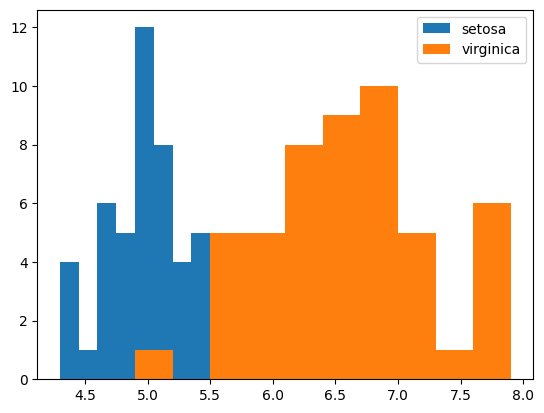

In [ ]:
## 히스토그램
# 수치형 데이터의 분포를 count로 표현할 때
# plt.hist(x): 수치형 데이터 배열을 input으로 받아옴
# Argument
# bins: histogram 칸마다의 간격
# label: 여러 histogram을 쌓고 각 이름을 정할때
# histtype: 'bar', 'barstacked', 'step','stepfilled'

setosa = iris[iris.species == 'setosa'].sepal_length
virginica = iris[iris.species == 'virginica'].sepal_length
plt.hist(setosa,label='setosa')
plt.hist(virginica,label='virginica')
plt.legend()

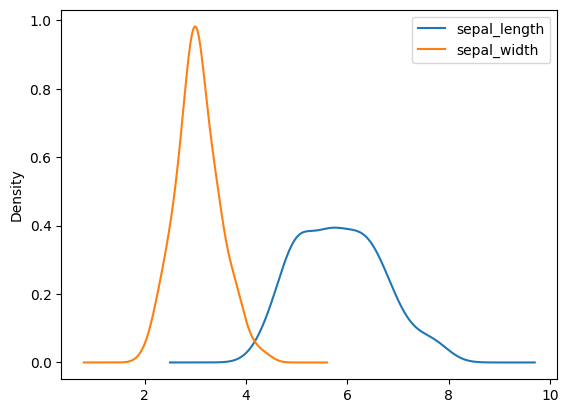

In [ ]:
## 커널 밀도 함수(KDE)
# 수치형 데이터 분포를 연속 함수로 보여주는 경우
# Pandas.plot.kde()함수 사용
# Argument: secondary_y: True로 사용시 y축 두 개로 분포를 나타냄

iris.sepal_length.plot.kde(label='sepal_length')
iris.sepal_width.plot.kde(label='sepal_width')
plt.legend()
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7d7afaa07550>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7d7af5912230>,
 'cmins': <matplotlib.collections.LineCollection at 0x7d7afaa07940>,
 'cbars': <matplotlib.collections.LineCollection at 0x7d7afaa04be0>}

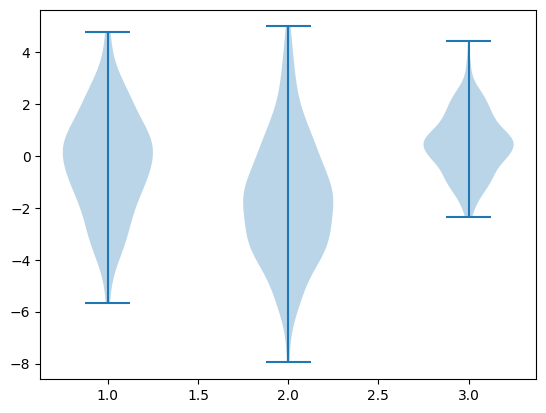

In [ ]:
## 바이올린 플롯
# box플롯가 유사하지만, 분포에 대한 정보를 더 자세히 나타내는 경우
# violinplot()함수를 사용: 인자로 받아오는 정보는 box()와 동일

data_a = np.random.normal(0,2.0,100)
data_b = np.random.normal(-1.5,2.5,200)
data_c = np.random.normal(0.3,1.3,300)
plt.violinplot([data_a,data_b,data_c])

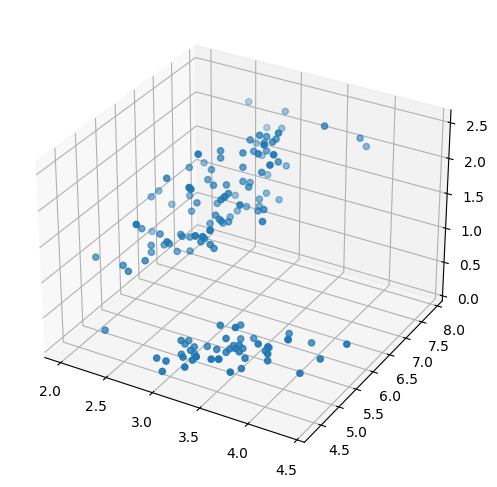

In [ ]:
## Axes3D
# 기존 pyplot의 2차원 그래프 외에 3차원 그래프가 필요한 경우
# mpl_toolkits.mplot3d에서 Axes3D 사용
# add_subplot()의 인자 projection = '3d'로 설정
# 기존 plot함수에 3개 차원의 데이터 입력

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111,projection = '3d')
s_w = iris.sepal_width
s_l = iris.sepal_length
p_w = iris.petal_width

ax.scatter(s_w,s_l,p_w)

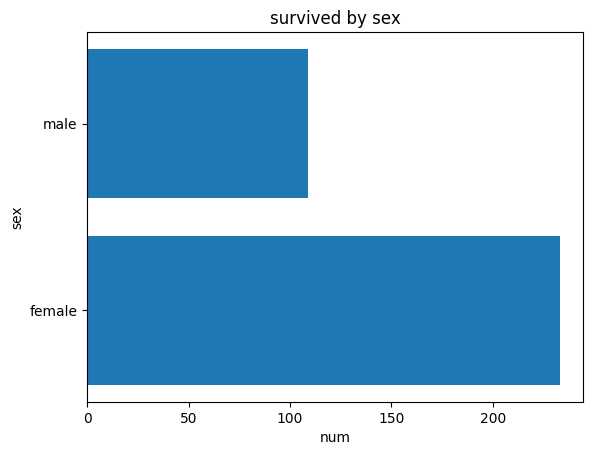

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Titanic 데이터 불러오기 (Seaborn의 load_dataset 사용)
titanic_data = sns.load_dataset('titanic')

# 성별에 따른 생존자 수 시각화 (barh 함수 사용)
survival_counts = titanic_data.groupby('sex')['survived'].sum() ## 집계 메서드를 사용하고 values 사용 가능
y = survival_counts.index
x = survival_counts.values
plt.barh(y,x)

# 그래프 제목 설정
plt.title('survived by sex')

# x, y 축 레이블 설정
plt.xlabel('num')
plt.ylabel('sex')

# 그래프 출력
plt.show()


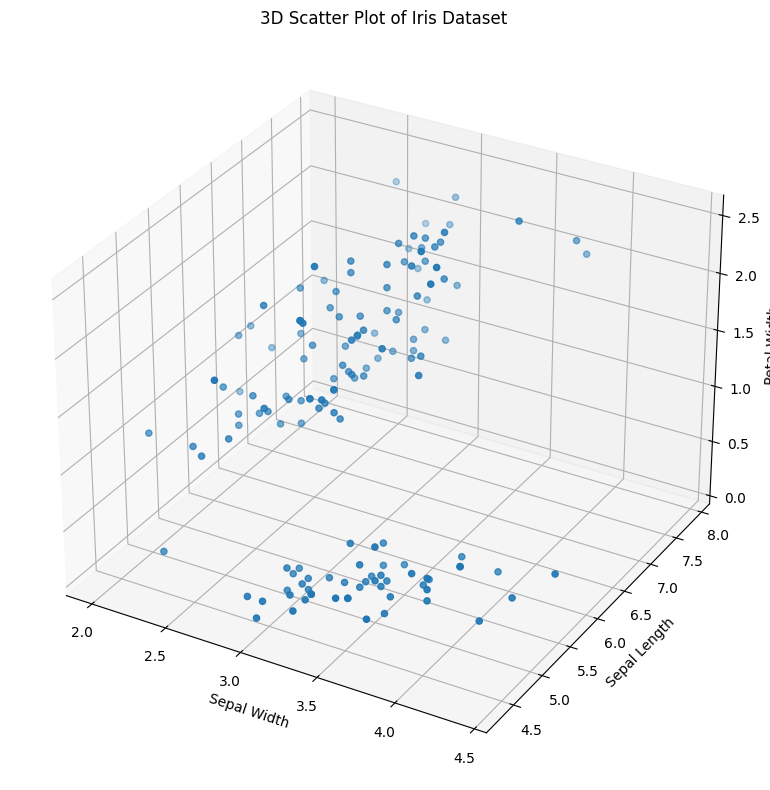

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Iris 데이터 불러오기 (Seaborn의 load_dataset 사용)
iris_data = sns.load_dataset('iris')

# 3차원 그래프 생성 (Axes3D 사용)
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

# 3차원 그래프에 데이터 시각화
s_w = iris_data.sepal_width
s_l = iris_data.sepal_length
p_w = iris_data.petal_width

ax.scatter(s_w,s_l,p_w)
# 그래프 제목 설정
ax.set_title('3D Scatter Plot of Iris Dataset')

# x, y, z 축 레이블 설정
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Sepal Length')
ax.set_zlabel('Petal Width')

plt.tight_layout()
# 그래프 출력
plt.show()


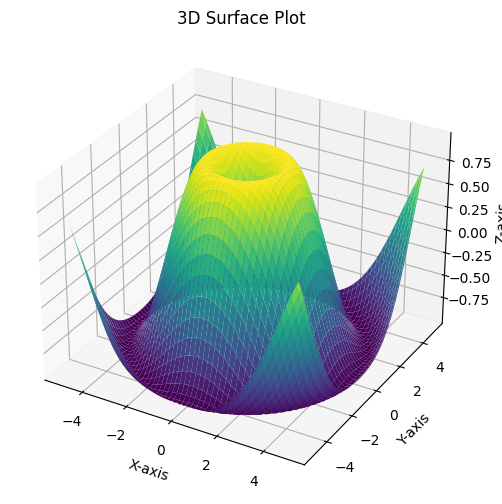

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_image():
    # 1. plot을 위한 3D 데이터 생성
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    ## to do - x, y 값을 plot에 적절하게 변경 (meshgrid)
    X, Y = np.meshgrid(x,y)
    ## to do - z 값을 생성
    Z = np.sin(np.sqrt(X**2 + Y**2))

    # 2. figure size 설정
    fig = plt.figure(figsize = (6,6))

    # 3. 데이터를 활용한 3d plot
    # to do - add_subplot을 사용하여 3d plot 생성
    ax = fig.add_subplot(111,projection = '3d')
    # to do - plot_surface를 사용하여 x, y, z plot
    ax.plot_surface(X, Y, Z, cmap='viridis')
    # to do - x label 설정
    ax.set_xlabel('X-axis')
    # to do - y label 설정
    ax.set_ylabel('Y-axis')
    # to do - z label 설정
    ax.set_zlabel('Z-axis')
    # to do - title 설정
    ax.set_title('3D Surface Plot')

    # 테스트 코드 (수정 금지)
    plt.savefig("3d_plot.png")


plot_image()

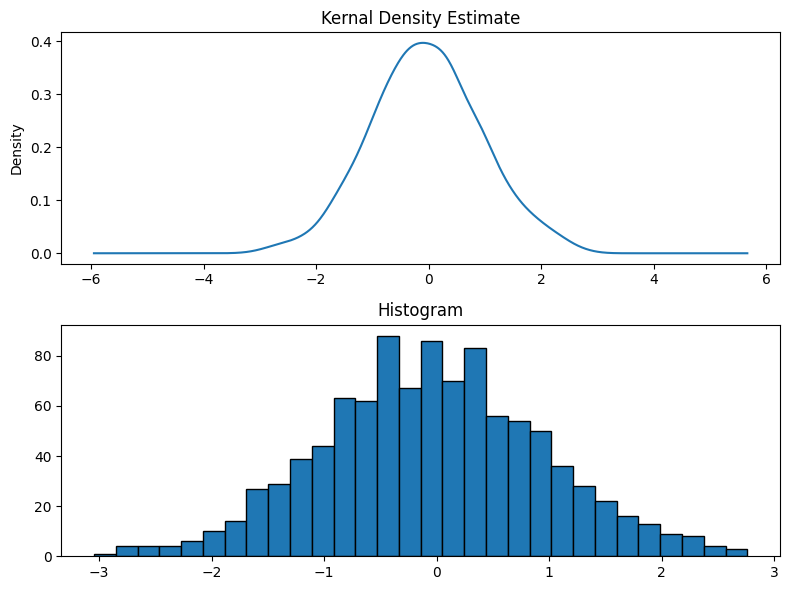

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def main():
    # 데이터 생성
    np.random.seed(0)
    data = pd.Series(np.random.randn(1000))

    # Step 1: Subplot 생성
    fig, axes = plt.subplots(2,1,figsize=(8,6))

    # Step 2: 첫 번째 subplot에 KDE 그리기
    data.plot.kde(ax = axes[0])

    # Step 3: 두 번째 subplot에 히스토그램 그리기
    axes[1].hist(data, bins = 30, edgecolor = 'black')

    # Step 4: 각 subplot에 제목 추가하기
    axes[0].set_title('Kernal Density Estimate')
    axes[1].set_title('Histogram')

    # 결과 저장
    plt.tight_layout()
    download_figure('subplot')


def download_figure(filename):
    plt.savefig(f"{filename}.png")


if __name__ == "__main__":
    main()
